This jupyter notebook emulates multi_model_comp

In [22]:
import numpy as np
import pandas as pd
import pylab
from src.batch_fitting_module import master
import matplotlib.backends.backend_pdf

import src.Trait_SIn as mod

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import arviz as az
import theano
%load_ext rpy2.ipython


In [16]:
def mod_plot(df,hpred,vpred,predtime):
    f,ax = pylab.subplots(1,2,figsize=[9,4.5])
    ax[0].errorbar(df.loc['host']['time'],df.loc['host']['abundance'],yerr=df.loc['host']['uncertainty'])
    ax[1].errorbar(df.loc['virus']['time'],df.loc['virus']['abundance'],yerr=df.loc['virus']['uncertainty'])
    ax[0].set_xlabel('Time (days)')
    ax[1].set_xlabel('Time (days)')
    ax[0].set_ylabel('Hosts ml$^{-1}$')
    ax[1].set_ylabel('Viruses ml$^{-1}$')
    ax[0].plot(predtime,hpred,label="fitted")
    ax[1].plot(predtime,vpred)
    ax[0].semilogy()
    ax[1].semilogy()
    return ax



In [17]:
df=pd.read_csv('data/testdat.csv')
df = df.set_index('organism')

In [18]:
runs = []
for i in range(1,9): #testing 1-8 cores
    for it in [1000,10000,100000]: #testing 1-8 cores
        prep = mod.SIn(df,Infection_states=0)
        t=%timeit -o prep.fit(iterations=it,cpu_cores=i,print_report=False)
        runs.append([t,it,i])

Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
876 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
8.79 s ± 93.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starting fitting procedure with 1 core
Starti

Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
303 ms ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
1.38 s ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure with 8 cores
Starting fitting procedure

In [20]:
time_df=[]
for run in runs:
    times,iterations,cores = run
    for el in times.all_runs:
        time_df.append([el,iterations,cores])
time_df = pd.DataFrame(time_df)
time_df.columns = ['time','iterations','cores']
time_df.to_csv('data/benchmark.csv')

R[write to console]: Saving 6.67 x 6.67 in image



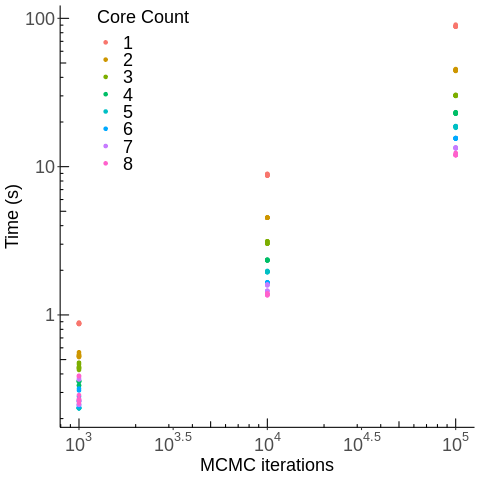

In [44]:
%%R -i time_df
library('ggplot2')

axis_text_size=18

plt <- ggplot(data=time_df,aes(x=iterations,y=time,color=as.factor(cores)))+
    geom_point()+
    scale_x_log10(
        breaks = scales::trans_breaks("log10", function(x) 10^x),
        labels = scales::trans_format("log10", scales::math_format(10^.x)))+
    #scale_x_log10(
    #breaks = scales::trans_breaks("log10", function(x) {10^x}),
    #labels = scales::trans_format("log10", scales::math_format(.x)))+
    scale_y_log10()+
#scale_y_log10(
    #breaks = scales::trans_breaks("log10", function(x) {10^x}),
    #labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    labs(x="MCMC iterations",y="Time (s)",color = "Core Count")+
    theme(panel.border = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank(),
          axis.line = element_line(color="black"),
          legend.position = c(0.2,0.8),
          axis.text = element_text(size=axis_text_size),
          axis.title = element_text(size=axis_text_size),
          legend.title=element_text(size=axis_text_size),
          legend.text=element_text(size=axis_text_size))+
    annotation_logticks()
print(plt)

ggsave(plot=plt,filename='figures/core_benchmark.png',device="png",dpi=300)

array([<AxesSubplot:xlabel='Time (days)', ylabel='Hosts ml$^{-1}$'>,
       <AxesSubplot:xlabel='Time (days)', ylabel='Viruses ml$^{-1}$'>],
      dtype=object)

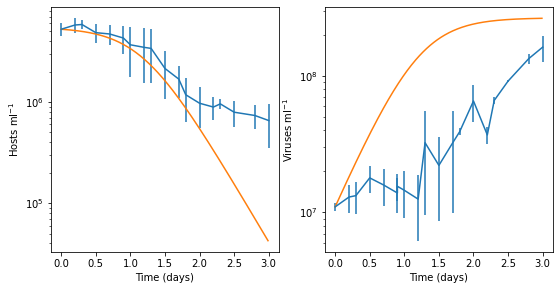

In [4]:
h,v=prep.integrate()
mod_plot(df,h,v,prep.times)

In [21]:
times[0].__dict__

{'loops': 1,
 'repeat': 7,
 'best': 1.358629705999192,
 'worst': 1.517333781999696,
 'all_runs': [1.386874189000082,
  1.3595905430011044,
  1.496399231000396,
  1.517333781999696,
  1.4402018900000257,
  1.360048894999636,
  1.358629705999192],
 'compile_time': 4.2000000000097515e-05,
 '_precision': 3,
 'timings': [1.386874189000082,
  1.3595905430011044,
  1.496399231000396,
  1.517333781999696,
  1.4402018900000257,
  1.360048894999636,
  1.358629705999192]}

<AxesSubplot:ylabel='Density'>

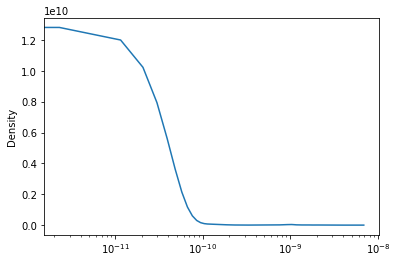

In [33]:
posterior['mu'].plot.density(logx=True)

array([<AxesSubplot:xlabel='Time (days)', ylabel='Hosts ml$^{-1}$'>,
       <AxesSubplot:xlabel='Time (days)', ylabel='Viruses ml$^{-1}$'>],
      dtype=object)

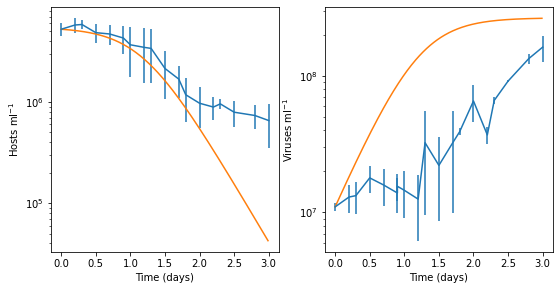

In [34]:
h,v=prep.integrate()
mod_plot(df,h,v,prep.times)